# Test

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime
import scipy
from glob import glob
import sys
from skimage import io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
sys.path.insert(0, '../scripts')

import helper as hp
import selenium_scrapeImages as sc
import deconvolution as deco

In [6]:
# testen von konvertieren in tensorflow.Dataset
dataset = tf.data.Dataset.from_tensor_slices({'images': images}) #from_tensor_slices((features,labels))
dataset 

NameError: name 'images' is not defined

In [7]:
# dataset1 = tf.data.Dataset.from_tensor_slices(...)

features, labels = (np.random.sample((100,2)), np.random.sample((100,1)))
dataset = tf.data.Dataset.from_tensor_slices((features,labels))

In [8]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

x = tf.reshape(x, [1, 2, 3, 1])  # give a shape accepted by tf.nn.max_pool

valid_pad = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
same_pad = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')

valid_pad.get_shape() == [1, 1, 1, 1]  # valid_pad is [5.]

True

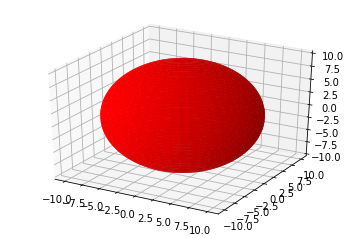

In [9]:
hp.draw_bullet_3d()

(128, 128)


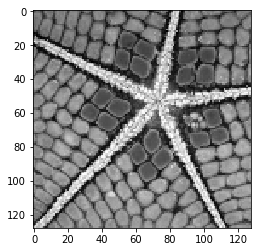

In [10]:
img = scipy.misc.imread('../data/2D/test.jpg', mode='L').astype(np.float)
img = hp.tranfer_squared_image(img)
img = cv2.resize(img, (128,128))

plt.imshow(img, cmap='gray')
print(img.shape)

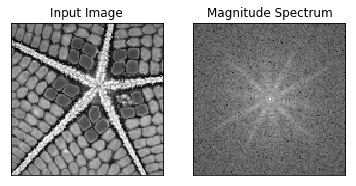

In [5]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
r = 25

In [ ]:
# SO MUSS EIN MODELL gefittet WERDEN !!!

# print('Training model...')

# Fit model on the batches generated by datagen.flow()
train_history = model.fit_generator(datagen.flow(X_train_norm, Y_train, batch_size=16), \
    steps_per_epoch=400, epochs=100, verbose=1, \
    validation_data=(X_test_norm, Y_test), \
    callbacks=[history, checkpointer, change_lr])    

# print('Training Completed!')

# FLASK

In [1]:
from flask import Flask
app = Flask(__name__)


@app.route('/')
def hello_world():
    return 'Hello, World!'

if __name__ == '__main__':
    app.run()
    
# open: 127.0.0.1:5000

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Aug/2018 15:06:44] "GET / HTTP/1.1" 200 -


# image operations

In [8]:
sys.path.insert(0, '../scripts')
import plot3DVol as plot3D
import helper as hp

sys.path.insert(0, '../scripts/NanoImagingPack')
from view import view, graph

path = r'C:\Users\praetoriusjanphilipp\AppData\Roaming\Python\Python36\site-packages'
sys.path.insert(0, path)
from tomophantom import TomoP2D
from tomophantom import TomoP3D

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [1]:
path = glob('../data/3D/VALIDATION/dub/*')
path = [item for item in path if item.endswith('.tiff') or item.endswith('.tif')]

NameError: name 'glob' is not defined

In [10]:
vol = io.imread(path[1])
print(vol.shape)
vol = hp.swapAxes(vol, swap=True)

vol_3D = plot3D.Interactive_3DVolume(vol=vol)
vol_3D.multi_slice_viewer()

(33, 512, 768)
volume shapes before / after: (512, 768, 33) / (33, 768, 512)
for change the stack use keys: {k,j}


In [11]:
img = vol[:,:,15]
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobelxy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)

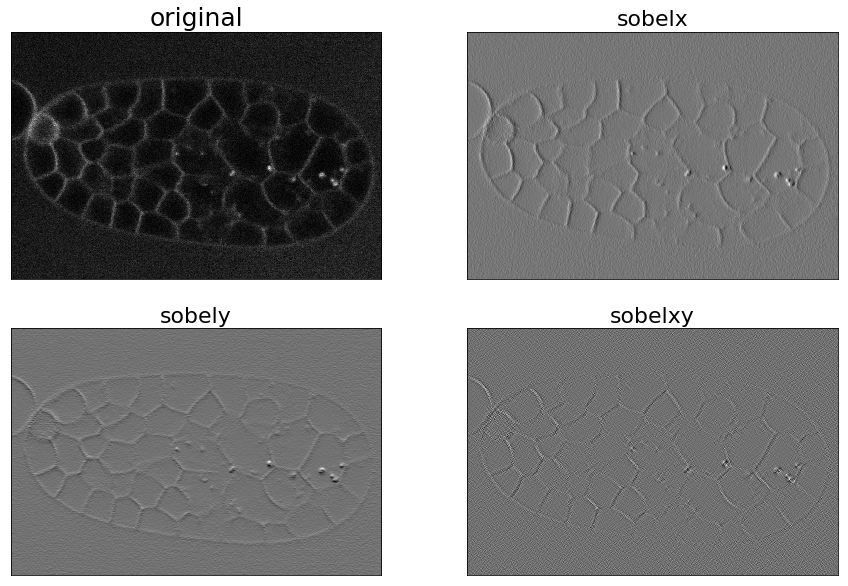

In [14]:
%matplotlib inline

f = plt.figure(figsize=(15,10))
plt.subplot(221); plt.imshow(img, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('original', fontsize=25)
plt.subplot(222); plt.imshow(sobelx, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('sobelx', fontsize=22)
plt.subplot(223); plt.imshow(sobely, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('sobely', fontsize=22)
plt.subplot(224); plt.imshow(sobelxy, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('sobelxy', fontsize=22)
plt.show()

In [15]:
blur = cv2.blur(img, ksize=(3,3))
gauss = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=5)

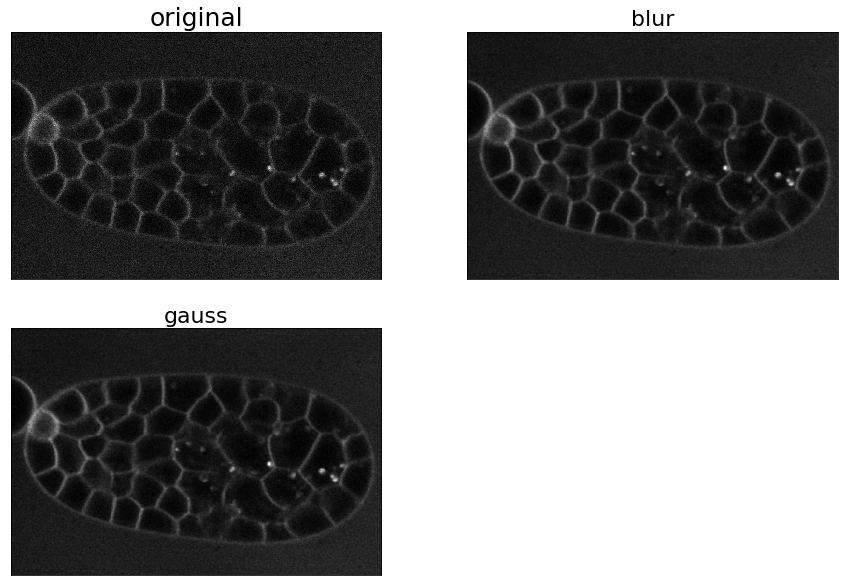

In [16]:
f = plt.figure(figsize=(15,10))
plt.subplot(221); plt.imshow(img, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('original', fontsize=25)
plt.subplot(222); plt.imshow(blur, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('blur', fontsize=22)
plt.subplot(223); plt.imshow(gauss, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('gauss', fontsize=22)
# plt.subplot(224); plt.imshow(sobelxy, cmap='gray'); 
# plt.xticks([]); plt.yticks([]); plt.title('sobelxy', fontsize=22)
plt.show()

# hp.print_volume_statistics(img, 'img')
# hp.print_volume_statistics(blur, 'blur')
# hp.print_volume_statistics(gauss, 'gauss')

In [17]:
# img_blur = cv2.medianBlur(img, 5)
ret,th1 = cv2.threshold(img_blur, 34, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,35, 5)
th3 = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, 5)
titles = ['Original Image', 'Global Thresholding (v = 30)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_blur, th1, th2, th3]

f = plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

NameError: name 'img_blur' is not defined

In [18]:
# resized = cv2.resize(th1, (512, 256))
c = int((img.shape[1]-img.shape[0])/2)
resized = th1[:,c:th1.shape[1]-c]
print(resized.shape)
plt.imshow(resized, cmap='gray')

print( int((img.shape[1]-img.shape[0])/2))

print(768/512)

NameError: name 'th1' is not defined

# generate syntetic stacks

In [10]:
test = np.random.randint(low=1, high=100, size=(10,10))
test

array([[76, 20, 84, 58, 75, 29, 37, 15, 87, 63],
       [86, 90, 50, 43, 18, 14, 61, 76, 26, 76],
       [36, 48, 34, 71, 39, 34, 66, 79, 78, 55],
       [60, 12, 68, 47, 55, 68, 71, 79, 31,  6],
       [31,  3, 47, 55, 39, 38,  1, 61, 45, 54],
       [58, 34, 20, 59, 56, 29, 44, 77, 63, 20],
       [86, 64, 29, 13, 23, 49, 22, 27, 51, 90],
       [65,  3,  8, 17,  3,  6,  4, 37, 33, 12],
       [13, 29, 15, 19, 86, 95, 45, 70, 28,  1],
       [88, 56, 99, 79,  9, 91, 62, 38, 37, 83]])

In [17]:
sigma = 2

res = scipy.ndimage.filters.gaussian_filter(test, sigma=(sigma, sigma), order=0)
res

array([[56, 55, 53, 50, 48, 47, 49, 51, 54, 56],
       [54, 53, 51, 49, 48, 48, 49, 51, 53, 54],
       [50, 49, 48, 47, 47, 47, 49, 50, 52, 52],
       [46, 45, 45, 45, 45, 46, 47, 48, 49, 49],
       [43, 42, 42, 42, 42, 43, 45, 46, 46, 46],
       [42, 41, 40, 39, 40, 41, 42, 44, 44, 44],
       [42, 41, 39, 38, 38, 39, 41, 42, 42, 42],
       [43, 42, 40, 40, 40, 41, 41, 42, 41, 41],
       [45, 44, 43, 42, 43, 43, 43, 43, 42, 41],
       [47, 46, 45, 45, 46, 46, 45, 44, 43, 42]])

In [21]:
from scipy.stats import poisson

mu = .1
poisson.cdf(test, mu)

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.99999615, 1.        , 1.        , 1.        ,
        1.        , 0.99532116, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.99999615, 1.       

[[ 94 104 106  97  99 100 101 103 108 100]
 [103 105 114 124  95  95  92 109 104 102]
 [100  98 118  89 118 119  89 105  94  99]
 [ 95  95  95  97  98  95  90  90 100 107]
 [ 99  99  85 113  92  83  90  96  96 107]
 [ 94  94  83  99 104 102 110  79  89 119]
 [114 107  91  92  99  99 106 101  94 105]
 [ 89  88  92  99  93  81  86 103 105  93]
 [ 88  78  98 118  91  86 104  86 101 108]
 [107 113  95  96  90 107  99  93 102  74]]


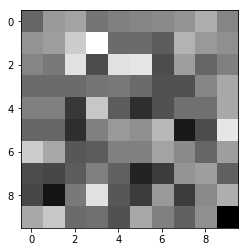

In [28]:
l = 100

pois = np.random.poisson(lam=l, size=(10,10))
print(pois)
plt.imshow(pois, cmap='gray')

(16, 16)
[[ 8 10 11 11 10  0 10  2 11 14 10 11  8  8  1  4  6  2 11 11  1  6  4  8
   3 10  7 13 12 10  2  6 12 10 15  2 12 13  8  2]
 [11  7 10  7 15 11 13 15  7 13 14  7 10 14 11  0  5  4  4 10  5 15 14  3
   2  6 15 10 15  2  0 15 10  1  3  2  7  5 15  4]]


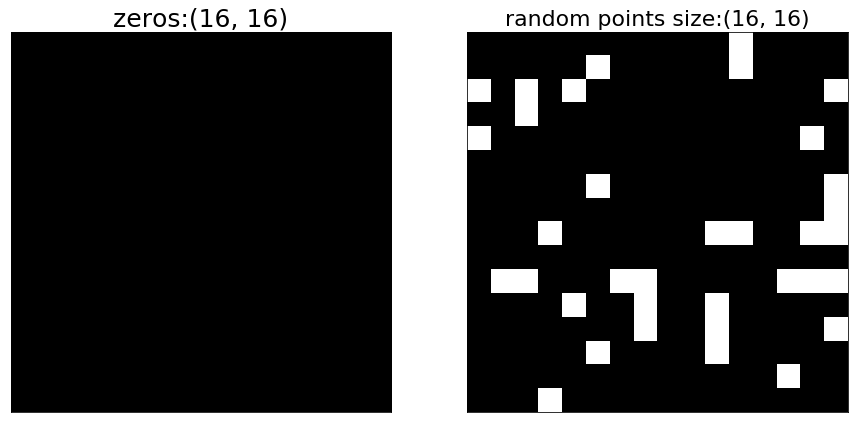

In [67]:
s_size = (16,16)
zeros = np.zeros(s_size)

n_points = 40
coords = np.random.randint(low=0, high=s_size[0], size=(2, n_points))

img_synth = zeros.copy()
for x,y in zip(coords[0], coords[1]):
    img_synth[x,y] = 1

print(zeros.shape)
print(coords)

f = plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(zeros, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('zeros:{}'.format(s_size), fontsize=25)
plt.subplot(122); plt.imshow(img_synth, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('random points size:{}'.format(s_size), fontsize=22)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


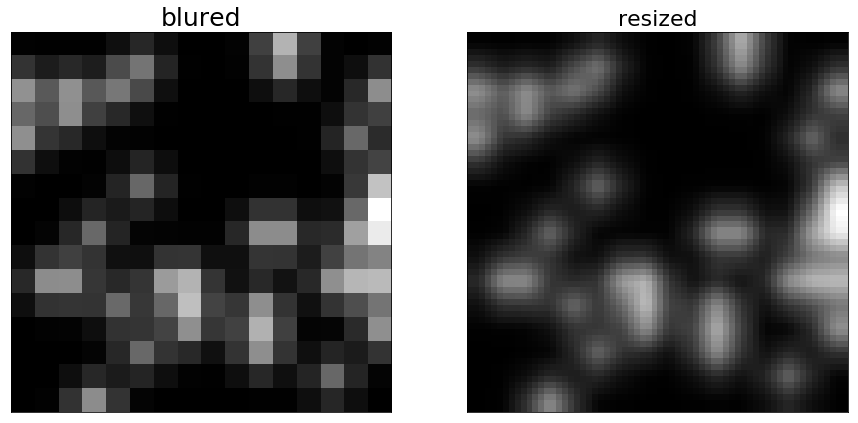

(16, 16) (64, 64)


In [88]:
from scipy import ndimage 
from scipy import misc 

sigma = .7
img_synth_blur = ndimage.filters.gaussian_filter(img_synth, sigma=(sigma, sigma), order=0)

resize = (64,64,64)
interpolation = ['nearest', 'lanczos', 'bilinear', 'bicubic', 'cubic']
img_resized = misc.imresize(img_synth_blur, size=resize, interp=interpolation[2])

f = plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img_synth_blur, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('blured', fontsize=25)
plt.subplot(122); plt.imshow(img_resized, cmap='gray'); 
plt.xticks([]); plt.yticks([]); plt.title('resized', fontsize=22)
plt.show()

print(img_synth_blur.shape, img_resized.shape)